## Importing Required Libraries

In this step, necessary Python libraries are imported for data handling,
text preprocessing, feature extraction, model training, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Dataset Loading

The fake news dataset is loaded using the Pandas library.
The dataset contains news statements and corresponding labels
indicating whether the news is fake or genuine.

In [2]:
# Load dataset (update path if needed)
data = pd.read_csv("train.csv")

# Display first 5 rows
data.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [4]:
# Dataset information
data.info()

# Label distribution
data['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


Label
True     5752
False    4488
Name: count, dtype: int64

## Text Preprocessing

This step cleans the news text by removing special characters,
converting text to lowercase, and eliminating unnecessary spaces.
Text preprocessing improves model accuracy.

In [5]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    text = text.split()
    text = ' '.join(text)
    return text

In [7]:
data['clean_text'] = data['Statement'].apply(preprocess_text)
data[['Statement', 'clean_text']].head()

,Statement,clean_text
0,Says the Annies List political group supports ...,says the annies list political group supports ...
1,When did the decline of coal start? It started...,when did the decline of coal start it started ...
2,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agrees with john mccain by vot...
3,Health care reform legislation is likely to ma...,health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...,the economic turnaround started at the end of ...


## Feature Extraction using TF-IDF

TF-IDF (Term Frequency–Inverse Document Frequency) is used to convert
textual data into numerical feature vectors based on word importance.

In [9]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

X = tfidf.fit_transform(data['clean_text'])
y = data['Label']

print("Feature matrix shape:", X.shape)

Feature matrix shape: (10240, 11318)


## Model Training

A Logistic Regression model is trained using TF-IDF features
to classify news articles as fake or genuine.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Model Evaluation

The trained model is evaluated using accuracy, precision, recall,
F1-score, and confusion matrix to measure classification performance.

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.60302734375

Classification Report:
               precision    recall  f1-score   support

       False       0.56      0.42      0.48       888
        True       0.63      0.74      0.68      1160

    accuracy                           0.60      2048
   macro avg       0.59      0.58      0.58      2048
weighted avg       0.60      0.60      0.59      2048



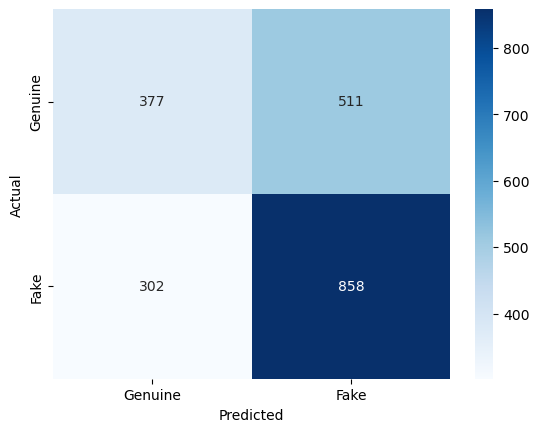

In [13]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine', 'Fake'],
            yticklabels=['Genuine', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Prediction on New Data

The trained model predicts whether a given news statement
is fake or genuine based on learned patterns.

In [14]:
def predict_news(news_text):
    news_text = preprocess_text(news_text)
    vector = tfidf.transform([news_text])
    prediction = model.predict(vector)
    return "Fake News" if prediction[0] == 1 else "Genuine News"

In [15]:
sample_news = "Breaking news: Scientists discover a cure for cancer!"
print(predict_news(sample_news))

Genuine News


## Saving the Model

The trained model and TF-IDF vectorizer are saved for future use
without retraining.

In [16]:
with open("final_model.sav", "wb") as model_file:
    pickle.dump(model, model_file)

with open("tfidf_vectorizer.sav", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


In [17]:
with open("final_model.sav", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("tfidf_vectorizer.sav", "rb") as vectorizer_file:
    loaded_tfidf = pickle.load(vectorizer_file)

test_text = "Government confirms new education policy reforms"
vector = loaded_tfidf.transform([preprocess_text(test_text)])
print("Prediction:", "Fake" if loaded_model.predict(vector)[0] == 1 else "Genuine")

Prediction: Fake
